## Importing Libraries

In [84]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load Preprocessed train and test 

In [85]:
df_train = pd.read_csv(r"C:\Users\dell\Desktop\ELEVVO INTERN\Student Score Prediction\Preprocessing and Feature Engineering\df_train.csv")
df_test = pd.read_csv(r"C:\Users\dell\Desktop\ELEVVO INTERN\Student Score Prediction\Preprocessing and Feature Engineering\df_test.csv")

In [86]:
X_train = df_train.drop(columns=["Exam_Score"])
y_train = df_train["Exam_Score"]
X_test = df_test.drop(columns=["Exam_Score"])
y_test = df_test["Exam_Score"]

## Feature Selection 

In [87]:
# Select top 20 features using univariate linear regression tests
selector = SelectKBest(score_func=f_regression, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", list(selected_features))

Selected features: ['num__Hours_Studied', 'num__Attendance', 'num__Previous_Scores', 'num__Tutoring_Sessions', 'num__study_sleep_ratio', 'num__study_tutoring_ratio', 'num__Attendance_norm', 'cat__Access_to_Resources_High', 'cat__Access_to_Resources_Low', 'cat__Extracurricular_Activities_No', 'cat__Peer_Influence_Negative', 'cat__Peer_Influence_Positive', 'cat__Learning_Disabilities_No', 'cat__Learning_Disabilities_Yes', 'cat__Parental_Education_Level_High School', 'cat__Parental_Education_Level_Postgraduate', 'cat__Distance_from_Home_Near', 'cat__income_level_Low', 'cat__income_level_Medium', 'cat__income_teacher_quality_Medium_Medium']


In [88]:
# Use Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get selected feature names
rfe_selected_features = X_train.columns[rfe.support_]
print("RFE selected features:", list(rfe_selected_features))

RFE selected features: ['num__Hours_Studied', 'num__Attendance', 'num__Previous_Scores', 'num__Tutoring_Sessions', 'num__Attendance_norm', 'cat__Access_to_Resources_High', 'cat__Access_to_Resources_Low', 'cat__Extracurricular_Activities_Yes', 'cat__Motivation_Level_High', 'cat__Internet_Access_No', 'cat__Peer_Influence_Negative', 'cat__Peer_Influence_Positive', 'cat__Learning_Disabilities_No', 'cat__Parental_Education_Level_Postgraduate', 'cat__Distance_from_Home_Near', 'cat__income_level_Medium', 'cat__income_teacher_quality_High_Low', 'cat__income_teacher_quality_Low_High', 'cat__income_teacher_quality_Medium_High', 'cat__income_teacher_quality_Medium_Low']


In [ ]:
selected_features = [
    'num__Hours_Studied',
    'num__Previous_Scores',
    'num__Attendance',
    'num__Attendance_norm',
    'num__Sleep_Hours',
    'num__Physical_Activity',
    'num__Tutoring_Sessions',
    'num__study_efficiency',
    'num__study_efficiency.1',
    'num__study_sleep_ratio',
    'num__study_tutoring_ratio',
    'num__active_hours',
    'cat__Access_to_Resources_High',
    'cat__Access_to_Resources_Medium',
    'cat__Motivation_Level_High',
    'cat__Motivation_Level_Medium',
    'cat__Learning_Disabilities_No',
    'cat__income_teacher_quality_Low_High',
    'cat__income_teacher_quality_Medium_High',
    'cat__income_teacher_quality_High_High',
    'cat__School_Type_Public',
    'cat__School_Type_Private',
    'cat__Peer_Influence_Positive'
]


## Linear Regression

In [ ]:
# Fit model using all features
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

# Predict on train and test sets
y_pred_all_train = lr_all.predict(X_train)
y_pred_all = lr_all.predict(X_test)

# Evaluate model
mse_all = mean_squared_error(y_test, y_pred_all)
r2_train = r2_score(y_train, y_pred_all_train)
r2_all = r2_score(y_test, y_pred_all)

print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_all)
print("MSE:", mse_all)

Train R2 Score: 0.6850325436179017
Test R2 Score: 0.7362329033709996
MSE: 3.728367026858426


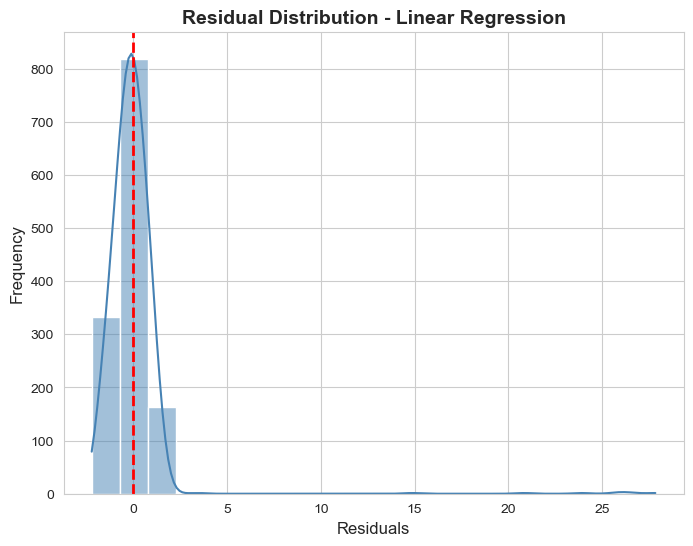

In [91]:
# Calculate residuals
residuals = y_test.values - y_pred_all

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()


In [92]:
# Fit linear regression model using selected features from SelectKBest
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# Predict on train and test sets
y_pred_train = lr.predict(X_train_selected)
y_pred_test = lr.predict(X_test_selected)

# Evaluate model
mse = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred_test)

print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2)
print("MSE:", mse)

Train R2 Score: 0.6629792232813978
Test R2 Score: 0.7112330590252852
MSE: 4.081741638500211


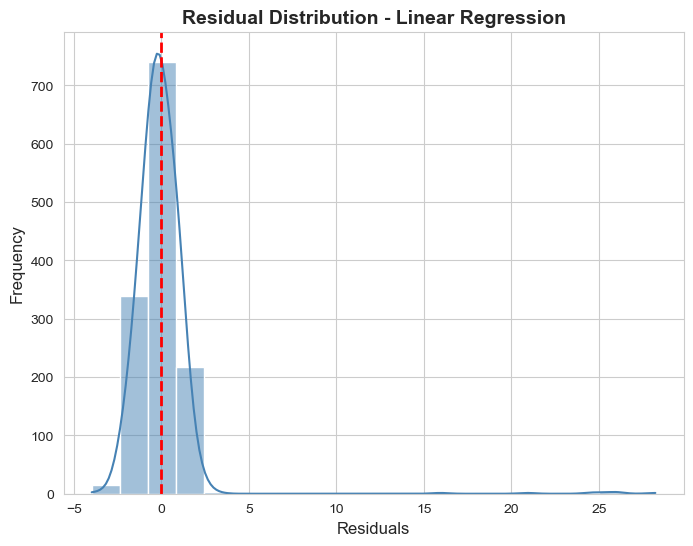

In [93]:
# Calculate residuals
residuals = y_test.values - y_pred_test

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Fit linear regression model using selected features from RFE
lr_rfe = LinearRegression()
lr_rfe.fit(X_train_rfe, y_train)

# Predict on train and test sets
y_pred_train_rfe = lr_rfe.predict(X_train_rfe)
y_pred_rfe = lr_rfe.predict(X_test_rfe)

# Evaluate model
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_train_rfe = r2_score(y_train, y_pred_train_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print("Train R2 Score :", r2_train_rfe)
print("Test R2 Score:", r2_rfe)
print("MSE:", mse_rfe)

Train R2 Score : 0.6740405988098219
Test R2 Score: 0.724662905790719
MSE: 3.8919097811687715


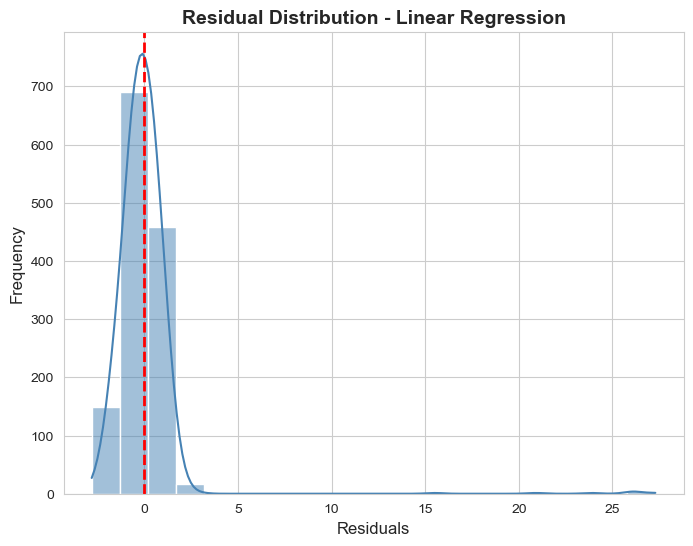

In [95]:
# Calculate residuals
residuals = y_test.values - y_pred_rfe

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Fit linear regression model using manually selected features
X_train_manual = X_train[selected_features]
X_test_manual = X_test[selected_features]

lr_manual = LinearRegression() 
lr_manual.fit(X_train_manual, y_train)

# Predict on train and test sets
y_pred_manual_train = lr_manual.predict(X_train_manual)
y_pred_manual = lr_manual.predict(X_test_manual)

# Evaluate model
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_train_manual = r2_score(y_train, y_pred_manual_train)
r2_manual = r2_score(y_test, y_pred_manual)

print("Train R2 Score :", r2_train_manual)
print("Test R2 Score:", r2_manual)
print("MSE:", mse_manual)


Train R2 Score : 0.6489495627003045
Test R2 Score: 0.703910792715591
MSE: 4.185242403454755


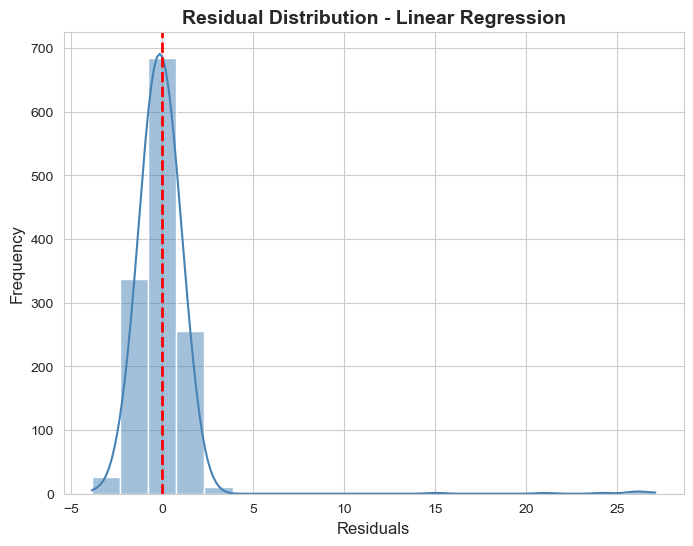

In [97]:
# Calculate residuals
residuals = y_test.values - y_pred_manual

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

## Polynomial Regression

In [98]:
poly_all = PolynomialFeatures(2)

X_train_poly_all = poly_all.fit_transform(X_train)
X_test_poly_all = poly_all.transform(X_test)

lr_poly_all = LinearRegression()
lr_poly_all.fit(X_train_poly_all, y_train)

y_pred_poly_all_train = lr_poly_all.predict(X_train_poly_all)
y_pred_poly_all = lr_poly_all.predict(X_test_poly_all)

mse_poly_all = mean_squared_error(y_test, y_pred_poly_all)
r2_poly_all_train = r2_score(y_train, y_pred_poly_all_train)
r2_poly_all = r2_score(y_test, y_pred_poly_all)

print("MSE:", mse_poly_all)
print("Train R2 Score:", r2_poly_all_train)
print("Test R2 Score:", r2_poly_all)

MSE: 4.735934293442954
Train R2 Score: 0.718552314898409
Test R2 Score: 0.6649515379230934


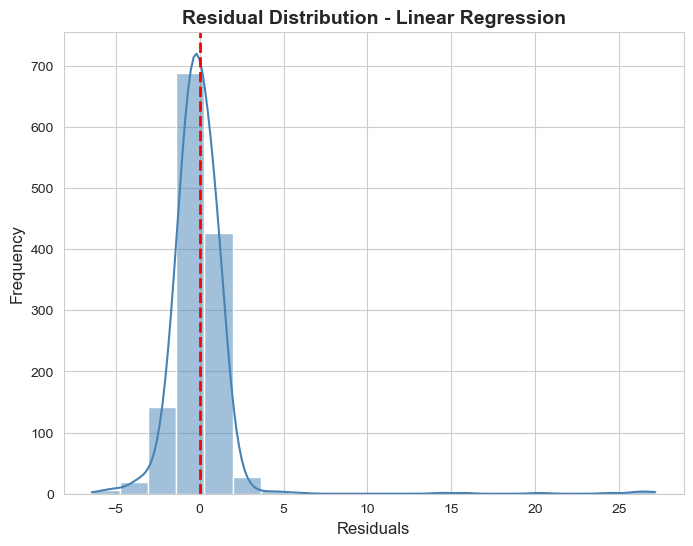

In [99]:
# Calculate residuals
residuals = y_test.values - y_pred_poly_all

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

In [100]:
poly_selected = PolynomialFeatures(2)

X_train_poly_selected = poly_selected.fit_transform(X_train_selected)
X_test_poly_selected = poly_selected.transform(X_test_selected)

lr_poly_selected = LinearRegression()
lr_poly_selected.fit(X_train_poly_selected, y_train)

y_pred_poly_selected_train = lr_poly_selected.predict(X_train_poly_selected)
y_pred_poly_selected = lr_poly_selected.predict(X_test_poly_selected)

mse_poly_selected = mean_squared_error(y_test, y_pred_poly_selected)
r2_poly_selected_train = r2_score(y_train, y_pred_poly_selected_train)
r2_poly_selected = r2_score(y_test, y_pred_poly_selected)

print("MSE:", mse_poly_selected)
print("Train R2 Score:", r2_poly_selected_train)
print("Test R2 Score:", r2_poly_selected)

MSE: 4.218737904681937
Train R2 Score: 0.6733281783079492
Test R2 Score: 0.7015411195999397


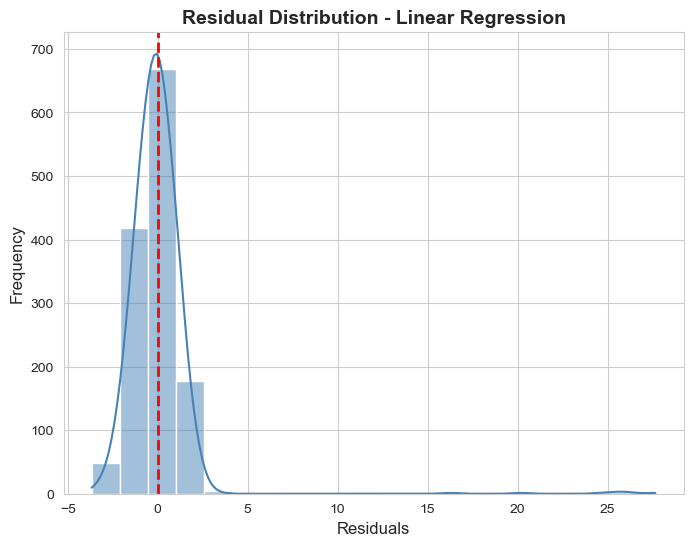

In [101]:
# Calculate residuals
residuals = y_test.values - y_pred_poly_selected

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

In [102]:
poly_rfe = PolynomialFeatures(2)

X_train_poly_rfe = poly_rfe.fit_transform(X_train_rfe)
X_test_poly_rfe = poly_rfe.transform(X_test_rfe)

lr_poly_rfe = LinearRegression()
lr_poly_rfe.fit(X_train_poly_rfe, y_train)

y_pred_poly_rfe_train = lr_poly_rfe.predict(X_train_poly_rfe)
y_pred_poly_rfe = lr_poly_rfe.predict(X_test_poly_rfe)

mse_poly_rfe = mean_squared_error(y_test, y_pred_poly_rfe)
r2_poly_rfe_train = r2_score(y_train, y_pred_poly_rfe_train)
r2_poly_rfe = r2_score(y_test, y_pred_poly_rfe)

print("MSE:", mse_poly_rfe)
print("Train R2 Score:", r2_poly_rfe_train)
print("Test R2 Score:", r2_poly_rfe)

MSE: 4.090670230060465
Train R2 Score: 0.6849064737890409
Test R2 Score: 0.7106013967839155


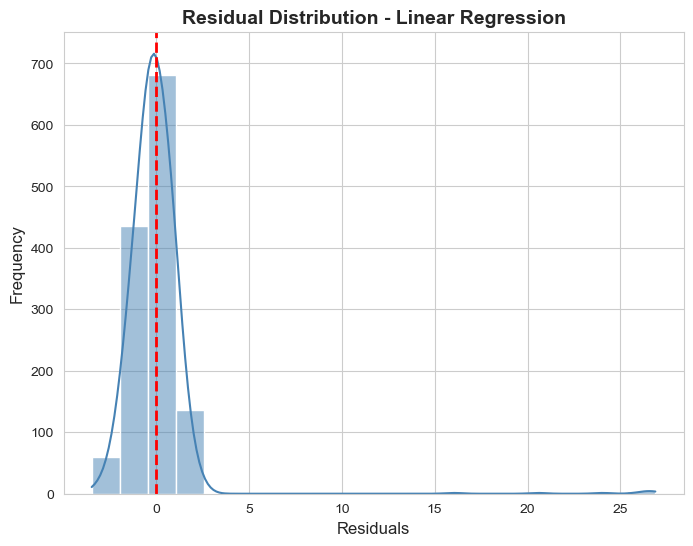

In [103]:
# Calculate residuals
residuals = y_test.values - y_pred_poly_rfe

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

In [104]:
poly_manual = PolynomialFeatures(2)

X_train_poly_manual = poly_manual.fit_transform(X_train_manual)
X_test_poly_manual = poly_manual.transform(X_test_manual)

lr_poly_manual = LinearRegression()
lr_poly_manual.fit(X_train_poly_manual, y_train)

y_pred_poly_manual_train = lr_poly_manual.predict(X_train_poly_manual)
y_pred_poly_manual = lr_poly_manual.predict(X_test_poly_manual)

mse_poly_manual = mean_squared_error(y_test, y_pred_poly_manual)
r2_poly_manual_train = r2_score(y_train, y_pred_poly_manual_train)
r2_poly_manual = r2_score(y_test, y_pred_poly_manual)

print("MSE:", mse_poly_manual)
print("Train R2 Score:", r2_poly_manual_train)
print("Test R2 Score:", r2_poly_manual)

MSE: 4.325510968925651
Train R2 Score: 0.6612349854874187
Test R2 Score: 0.6939873511670402


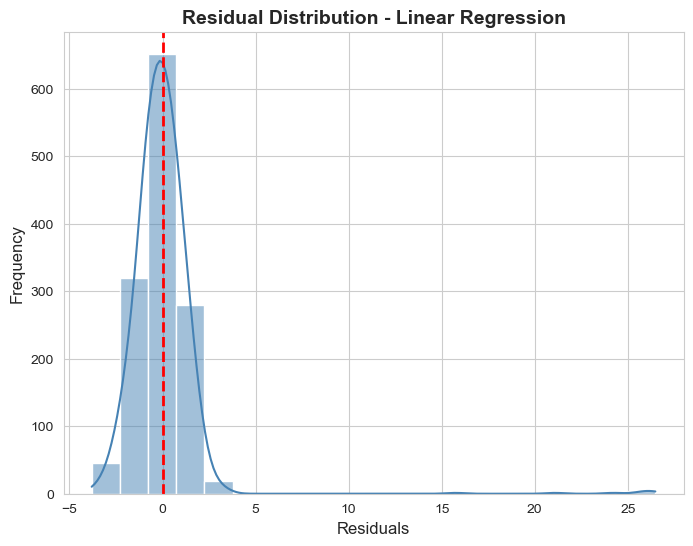

In [105]:
# Calculate residuals
residuals = y_test.values - y_pred_poly_manual

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=20)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution - Linear Regression', fontsize=14, fontweight='bold')
plt.show()

## Compare performance between Linear and Polynomial Regression with this dataset

In [106]:
results = [
    {
        "Model": "Linear (All Features)",
        "Train R2": r2_train,
        "Test R2": r2_all,
        "Test MSE": mse_all
    },
    {
        "Model": "Linear (SelectKBest)",
        "Train R2": r2_train,
        "Test R2": r2,
        "Test MSE": mse
    },
    {
        "Model": "Linear (RFE)",
        "Train R2": r2_train,
        "Test R2": r2_rfe,
        "Test MSE": mse_rfe
    },
    {
        "Model": "Linear (Manual)",
        "Train R2": r2_train_manual,
        "Test R2": r2_manual,
        "Test MSE": mse_manual
    },
    {
        "Model": "Polynomial (All Features)",
        "Train R2": r2_poly_all_train,
        "Test R2": r2_poly_all,
        "Test MSE": mse_poly_all
    },
    {
        "Model": "Polynomial (SelectKBest)",
        "Train R2": r2_poly_selected_train,
        "Test R2": r2_poly_selected,
        "Test MSE": mse_poly_selected
    },
    {
        "Model": "Polynomial (RFE)",
        "Train R2": r2_poly_rfe_train,  
        "Test R2": r2_poly_rfe,
        "Test MSE": mse_poly_rfe
    },
    {
        "Model": "Polynomial (Manual)",
        "Train R2": r2_poly_manual_train,
        "Test R2": r2_poly_manual,
        "Test MSE": mse_poly_manual
    }
]

results_df = pd.DataFrame(results)
print(results_df)

                       Model  Train R2   Test R2  Test MSE
0      Linear (All Features)  0.662979  0.736233  3.728367
1       Linear (SelectKBest)  0.662979  0.711233  4.081742
2               Linear (RFE)  0.662979  0.724663  3.891910
3            Linear (Manual)  0.648950  0.703911  4.185242
4  Polynomial (All Features)  0.718552  0.664952  4.735934
5   Polynomial (SelectKBest)  0.673328  0.701541  4.218738
6           Polynomial (RFE)  0.684906  0.710601  4.090670
7        Polynomial (Manual)  0.661235  0.693987  4.325511


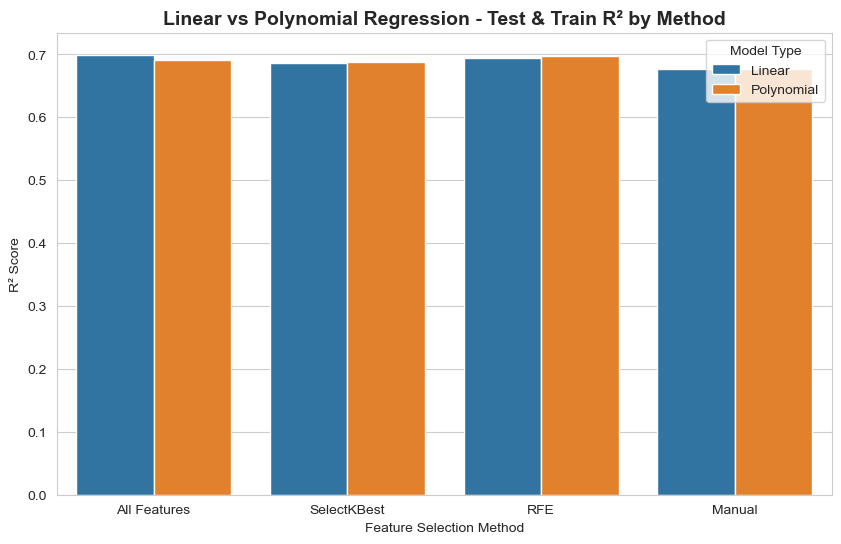

In [ ]:
sns.set_style("whitegrid")

# Melt the dataframe for R² plotting
r2_df = results_df.melt(id_vars='Model', value_vars=['Train R2', 'Test R2'], var_name='Metric', value_name='Score')

# Identify method 
r2_df['Method'] = r2_df['Model'].str.extract(r'\((.*?)\)')

# Identify model type 
r2_df['Type'] = r2_df['Model'].apply(lambda x: 'Linear' if x.startswith('Linear') else 'Polynomial')

# Plot R² comparison
plt.figure(figsize=(10,6))
sns.barplot(data=r2_df, x='Method', y='Score', hue='Type', ci=None)
plt.title('Linear vs Polynomial Regression - Test & Train R² by Method', fontsize=14, fontweight='bold')
plt.ylabel('R² Score')
plt.xlabel('Feature Selection Method')
plt.legend(title='Model Type')
plt.show()

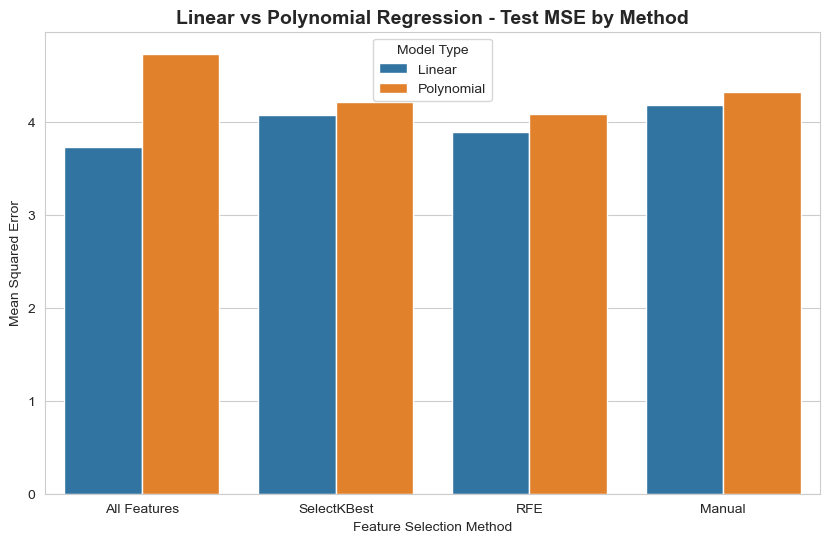

In [108]:
# MSE comparison
mse_df = results_df[['Model', 'Test MSE']].copy()
mse_df['Method'] = mse_df['Model'].str.extract(r'\((.*?)\)')
mse_df['Type'] = mse_df['Model'].apply(lambda x: 'Linear' if x.startswith('Linear') else 'Polynomial')

plt.figure(figsize=(10,6))
sns.barplot(data=mse_df, x='Method', y='Test MSE', hue='Type', ci=None)
plt.title('Linear vs Polynomial Regression - Test MSE by Method', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xlabel('Feature Selection Method')
plt.legend(title='Model Type')
plt.show()